In [1]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm

from yaml import load
from yaml.loader import Loader

from helpers.descriptors import Section
from helpers.utils import plot_cloud_centreline

In [2]:
BASENAME = "02_GrotteDeLaCascadeDeMotiers"
#BASENAME = "12_RuptDuPuits"
#BASENAME = "09_GrotteDeVallorbe"

fp = f"../../real_data/{BASENAME}/params.yaml"

params = load(open(fp), Loader)

GLOBAL_SHIFT = params["alignment"]["globalShift"]

SECTION = "1"
PASSAGE = "ThirdGallery"

In [3]:
f"../../real_data/{BASENAME}/output/{PASSAGE}_{SECTION}_clean.stl"

'../../real_data/02_GrotteDeLaCascadeDeMotiers/output/ThirdGallery_1_clean.stl'

In [4]:
data = pv.read(f"../../real_data/{BASENAME}/output/{PASSAGE}_{SECTION}_clean.stl").extract_surface().triangulate()

In [5]:
plane_origins = np.loadtxt(f"../../real_data/{BASENAME}/process/planes_as_vectors/{PASSAGE}_{SECTION}_Planes_Origin.txt")
plane_vectors =  np.loadtxt(f"../../real_data/{BASENAME}/process/planes_as_vectors/{PASSAGE}_{SECTION}_Planes.txt")

curvilinear_pos = np.linalg.norm(np.diff(plane_origins, axis = 0), axis = 1)

In [6]:
# extract the vertices of the mesh
data_pt = data.cast_to_pointset().points - GLOBAL_SHIFT


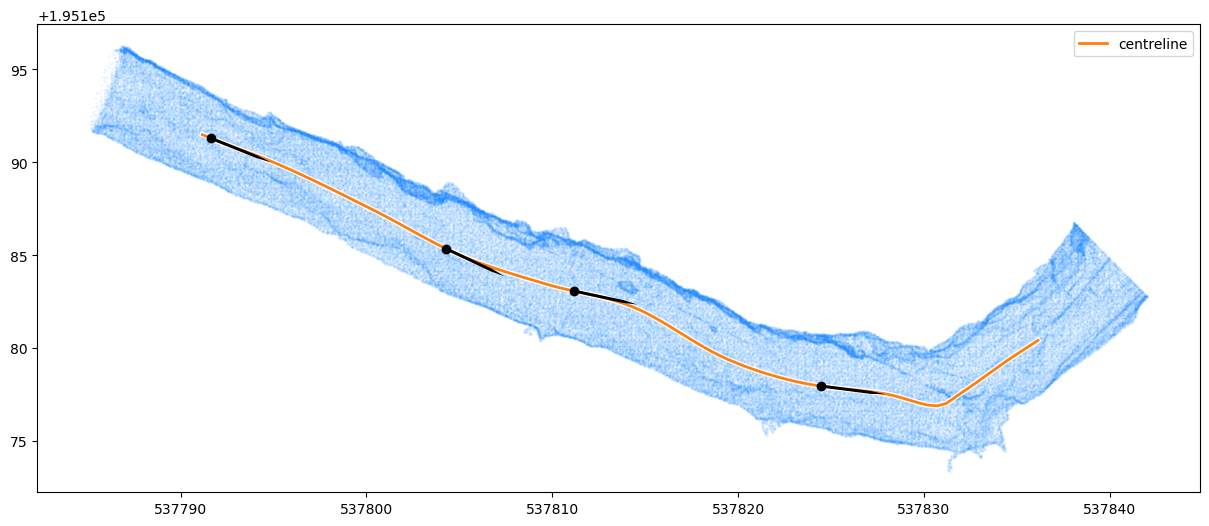

In [20]:
fig, ax = plt.subplots(figsize = (15, 10))

plot_cloud_centreline(ax, data_pt, plane_origins)

for i in [1, 30, 45, 75]:
    ax.scatter(plane_origins[i, 0], plane_origins[i, 1], color = "k", zorder = 100)
    ax.quiver(plane_origins[i, 0], plane_origins[i, 1], plane_vectors[i, 0], plane_vectors[i, 1], zorder = 100,headwidth = 1, width = 0.0025)
plt.show()

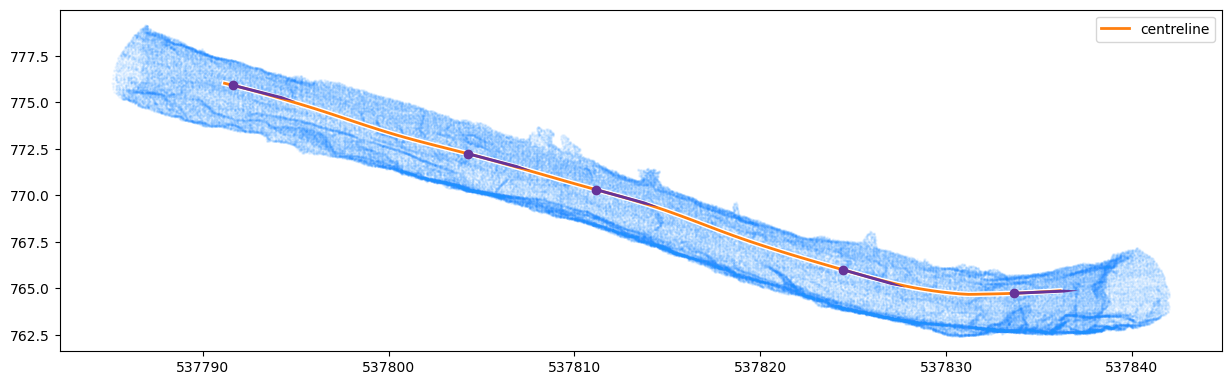

In [24]:
fig, ax = plt.subplots(figsize = (15, 10))
plot_cloud_centreline(ax, data_pt, plane_origins,view = "PROFILE N")

for i in [1, 30, 45, 75, 95]:
    ax.scatter(plane_origins[i, 0], plane_origins[i, 2], color = "rebeccapurple", zorder = 100)
    ax.quiver(plane_origins[i, 0], plane_origins[i, 2], plane_vectors[i, 0], plane_vectors[i, 2], zorder = 100,headwidth = 1, width = 0.0025, color = "rebeccapurple")
plt.show()